<a href="https://colab.research.google.com/github/syedshubha/QNET25_Shubha/blob/main/qnet25Sh1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet qutip
%pip install --quiet qiskit
%pip install --quiet qiskit-aer
%pip install --quiet pylatexenc

In [2]:
from qutip import *
import numpy as np
from qiskit import *
from qiskit.quantum_info import *

from qiskit.quantum_info import Statevector, random_statevector, partial_trace
from qiskit.circuit.library import QFT
import matplotlib.pyplot as plt

In [3]:
def create_teleportation_circuit():
    qc = QuantumCircuit(3, 2)  # 3 qubits: q0 (Alice), q1 (entangled), q2 (Bob); 2 classical bits for measurement

    # 1. Prepare the custom state on q0 (state to teleport)
    custom_state = [0.6, -0.8j]  # Custom state vector
    norm = np.linalg.norm(custom_state)  # Normalize the state vector
    custom_state = [amp / norm for amp in custom_state]
    qc.initialize(custom_state, 0)

    # 2. Create an EPR pair (Bell state) between q1 and q2
    qc.h(1)
    qc.cx(1, 2)

    # 3. Entangle q0 with q1
    qc.cx(0, 1)
    qc.h(0)

    # 4. Measure q0 and q1
    qc.measure(0, 0)
    qc.measure(1, 1)

    # 5. Conditional operations on q2 (Bob's qubit) based on Alice's measurements
    qc.x(2).c_if(0, 1)  # Apply X if classical bit 0 is 1
    qc.z(2).c_if(1, 1)  # Apply Z if classical bit 1 is 1

    return qc

<ipython-input-3-b7879c998ba9>:23: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(2).c_if(0, 1)  # Apply X if classical bit 0 is 1
<ipython-input-3-b7879c998ba9>:24: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(2).c_if(1, 1)  # Apply Z if classical bit 1 is 1


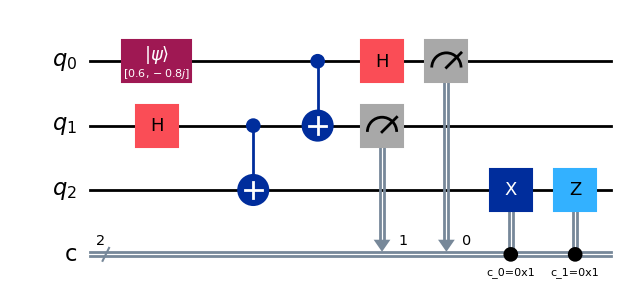

In [10]:
qc = create_teleportation_circuit()
qc.draw(output="mpl")


In [12]:
zero = basis(2, 0)
one = basis(2, 1)

bell_state = (tensor(zero, zero) + tensor(one, one)).unit()

In [16]:
# Define parameters for noise
gamma_amp = 0.1  # Amplitude damping probability
gamma_phase = 0.2  # Phase damping probability

# Amplitude damping operators
E0_amp = Qobj([[1, 0], [0, np.sqrt(1 - gamma_amp)]])  # No error
E1_amp = Qobj([[0, np.sqrt(gamma_amp)], [0, 0]])      # Amplitude damping error


# Initial Bell state
rho = ket2dm(bell_state)  # Convert to density matrix

# Define identity for second qubit
I = qeye(2)

# Apply amplitude damping on the first qubit
K0_amp = tensor(E0_amp,I)
K1_amp = tensor(E1_amp,I)
rho_after_amp = K0_amp * rho * K0_amp.dag() + K1_amp * rho * K1_amp.dag()



# Final state after errors
rho_final = rho_after_amp

# Print results
print("Initial Bell state density matrix:")
print(rho)
print("\nDensity matrix after amplitude damping on first qubit:")
print(rho_after_amp)

Initial Bell state density matrix:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5 0.  0.  0.5]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.5 0.  0.  0.5]]

Density matrix after amplitude damping on first qubit:
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.5        0.         0.         0.47434165]
 [0.         0.05       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.47434165 0.         0.         0.45      ]]


TypeError: '>=' not supported between instances of 'Qobj' and 'Qobj'

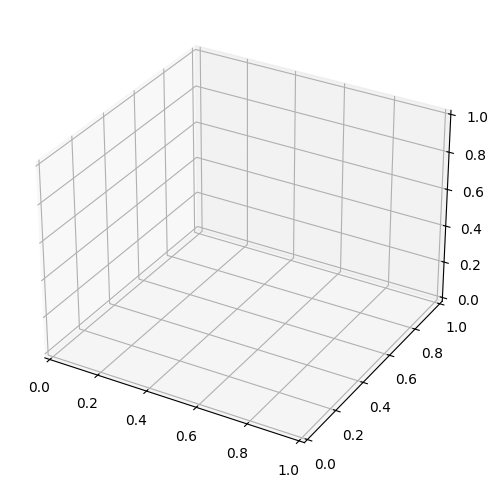

In [23]:
x, y = np.meshgrid(np.arange(rho.shape[0]), np.arange(rho.shape[1]), indexing="ij")
x = x.flatten()  # Flatten to 1D
y = y.flatten()
z = np.zeros_like(x)  # Start all bars from z=0

# Step 3: Get the heights (matrix values)
dx = dy = 0.8  # Width of each bar
dz =  np.array(rho).flatten() # Heights from the matrix

# Step 4: Plot the 3D Histogram
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Create 3D bars
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color="skyblue", edgecolor="black")

# Step 5: Add Labels and Customize
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Values")
ax.set_title("Density Matrix of EPR pair")

# Show the plot
plt.show()

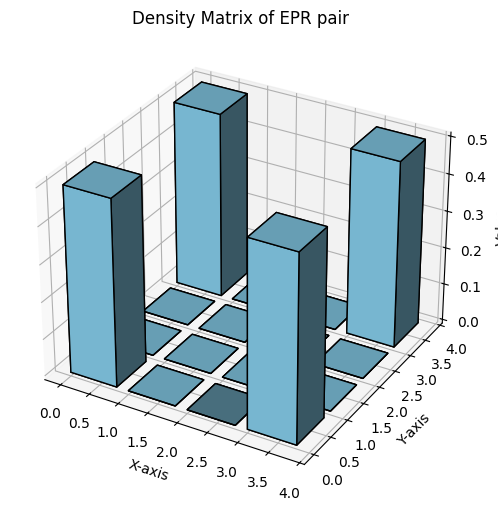

In [24]:
#manual
rho = np.zeros((4, 4))
rho[[0, 0, 3, 3], [0, 3, 0, 3]] = 0.5
x, y = np.meshgrid(np.arange(rho.shape[0]), np.arange(rho.shape[1]), indexing="ij")
x = x.flatten()  # Flatten to 1D
y = y.flatten()
z = np.zeros_like(x)  # Start all bars from z=0

# Step 3: Get the heights (matrix values)
dx = dy = 0.8  # Width of each bar
dz =  np.array(rho).flatten() # Heights from the matrix

# Step 4: Plot the 3D Histogram
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Create 3D bars
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color="skyblue", edgecolor="black")

# Step 5: Add Labels and Customize
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Values")
ax.set_title("Density Matrix of EPR pair")

# Show the plot
plt.show()

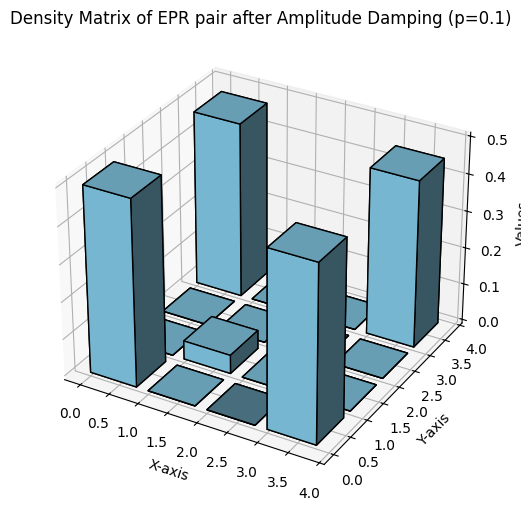

In [25]:
rho_after_amp = np.zeros((4, 4))

rho_after_amp[0, 0] = 0.5
rho_after_amp[0, 3] = 0.47434165
rho_after_amp[1, 1] = 0.05
rho_after_amp[3, 0] = 0.47434165
rho_after_amp[3, 3] = 0.45

x, y = np.meshgrid(np.arange(rho_after_amp.shape[0]), np.arange(rho_after_amp.shape[1]), indexing="ij")
x = x.flatten()  # Flatten to 1D
y = y.flatten()
z = np.zeros_like(x)  # Start all bars from z=0

# Step 3: Get the heights (matrix values)
dx = dy = 0.8  # Width of each bar
dz =  np.array(rho_after_amp).flatten() # Heights from the matrix

# Step 4: Plot the 3D Histogram
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

# Create 3D bars
ax.bar3d(x, y, z, dx, dy, dz, shade=True, color="skyblue", edgecolor="black")

# Step 5: Add Labels and Customize
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Values")
ax.set_title("Density Matrix of EPR pair after Amplitude Damping (p=0.1)")

# Show the plot
plt.show()

In [26]:
# Phase damping operators
E0_phase = Qobj([[1, 0], [0, np.sqrt(1 - gamma_phase)]])  # No error
E1_phase = Qobj([[0, 0], [0, np.sqrt(gamma_phase)]])      # Phase damping error
# Apply phase damping on the first qubit
K0_phase = tensor(E0_phase,I)
K1_phase = tensor(E1_phase,I)


In [27]:
from scipy.optimize import minimize
from scipy.linalg import logm

def von_neumann_entropy(rho):
    eigenvalues = rho.eigenenergies()
    eigenvalues = eigenvalues[eigenvalues > 0]  # Ignore zero eigenvalues
    return -np.sum(eigenvalues * np.log2(eigenvalues))

In [28]:
# Quantum Mutual Information
def quantum_mutual_information(rho):
    rho_A = rho.ptrace(0)  # Partial trace over B
    rho_B = rho.ptrace(1)  # Partial trace over A
    return von_neumann_entropy(rho_A) + von_neumann_entropy(rho_B) - von_neumann_entropy(rho)

# Classical Mutual Information
def classical_mutual_information(rho):
    def conditional_entropy(proj_ops):
        total_entropy = 0
        for proj in proj_ops:
            rho_k = (proj * rho * proj.dag()).unit() if (proj * rho * proj.dag()).norm() != 0 else None
            p_k = (proj * rho * proj.dag()).norm()
            if p_k > 0 and rho_k is not None:
                total_entropy += p_k * von_neumann_entropy(rho_k.ptrace(0))
        return total_entropy

    # Measurement basis on the second subsystem (B)
    proj_ops = [basis(2, 0) * basis(2, 0).dag(), basis(2, 1) * basis(2, 1).dag()]
    return von_neumann_entropy(rho.ptrace(0)) - conditional_entropy(proj_ops)

# Quantum Discord
def quantum_discord(rho):
    return quantum_mutual_information(rho) - classical_mutual_information(rho)

In [29]:
# Concurrence for two-qubit state
def concurrence(rho):
    Y = Qobj([[0, -1j], [1j, 0]])  # Pauli Y
    R = rho * tensor(Y, Y) * rho.conj() * tensor(Y, Y)
    eigenvalues = np.sqrt(np.real(np.sort(R.eigenenergies())[::-1]))
    return max(0, eigenvalues[0] - sum(eigenvalues[1:]))

# Entanglement of Formation
def entanglement_of_formation(rho):
    C = concurrence(rho)
    if C == 0:
        return 0
    h = lambda x: -x * np.log2(x) - (1 - x) * np.log2(1 - x) if x > 0 else 0
    return h((1 + np.sqrt(1 - C**2)) / 2)

In [30]:
# Calculate Quantum Discord and Entanglement of Formation for Bell State
discord = quantum_discord(rho)
eof = entanglement_of_formation(rho)

# Output results
print(f"Quantum Discord: {discord:.6f}")
print(f"Entanglement of Formation: {eof:.6f}")


AttributeError: 'numpy.ndarray' object has no attribute 'ptrace'